## Exercise 1

**Using the football dataset, estimate the following conditional probabilities in two different ways (one through relative frequencies and one using an approximated distribution):**

- P1: Pr(Favorite wins | point spread = 8)
- P2: Pr(Favorite wins by at least 8 points | point spread = 8)
- P3: Pr(Favorite wins by at least 8 points | point spread = 8 and favorite wins)

In [2]:
import pandas as pd
import numpy as np

football_dataset_path = '/content/football_dataset.txt'
data = pd.read_csv(football_dataset_path, index_col=False, header=0, sep=",")
data.head(3)

,home,favorite,underdog,spread,favorite.name,underdog.name,week
0,1,21,13,2.0,TB,MIN,1
1,1,27,0,9.5,ATL,NO,1
2,1,31,0,4.0,BUF,NYJ,1


###ANSWER-1.1: Using Relative Frequencies:

In [3]:
outcome = np.array(data['favorite'] - data['underdog']) 
point_spread = np.array(data['spread'])

In [4]:
#P1 = Pr(Favorite wins | point spread = 8)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out>0: #Favorite wins and point spread = 8
        i+=1
    if ps==8: #point spread = 8
        j+=1 
        
P1 = i / j
print('P1 = ' + str(P1))

P1 = 0.7551020408163265


In [5]:
#P2: Pr(Favorite wins by at least 8 points | point spread = 8)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out >= 8: #Favorite wins by at least 8 points and point spread = 8
        i+=1
    if ps==8: #point spread = 8
        j+=1
        
P2 = i / j
print('P2 = ' + str(P2))

P2 = 0.4489795918367347


In [6]:
#P3: Pr(Favorite wins by at least 8 points | point spread = 8 and favorite wins)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out >= 8 and out > 0: #Favorite wins by at least 8 points and point spread = 8
        i+=1
    if ps==8 and out >0: #point spread = 8 and and favorite wins
        j+=1
        
P3 = i / j
print('P3 = ' + str(P3))

P3 = 0.5945945945945946


###ANSWER-1.2: using an approximated distribution:

Sample mean = 0.22589285714285715
Sample std dev = 13.687140377113334


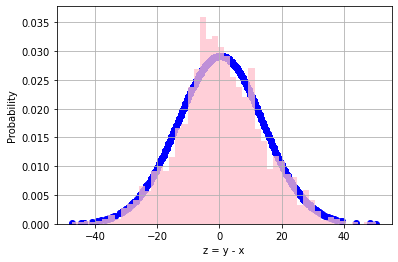

In [14]:
#Let's denote by y the outcome of a game and x its point spread.
import matplotlib.pyplot as plt
y = np.array(data['favorite'] - data['underdog'])
x = np.array(data['spread'])
z = y - x

#Now let's plot the histogram of z, and the approximated Gaussian distribution of z|x.

from scipy.stats import norm

sample_mean = np.mean(z)
sample_std_dev = np.std(z)

print("Sample mean = " + str(sample_mean))
print("Sample std dev = " + str(sample_std_dev))

#Let's create a normal distribution with sample mean and sample std:
dist = norm(loc=sample_mean, scale=sample_std_dev)

#Now we plot the histogram and approximated Normal dist.
plt.figure()
n, bins, patches = plt.hist(z, 50, density=True, facecolor='pink', alpha=0.75)
plt.scatter(z, dist.pdf(z), color='blue')

plt.xlabel('z = y - x')
plt.ylabel('Probability')
plt.grid(True)

plt.show()

We see the plot of x and z above. The empricial distribution is coming from the football dataset, and we plot it as a histogram. Also we plot a normal distribution using emprical mean and std. What we see is that the empirical distribution of z is very similar to normal distribution. We can maybe suggest that the distribution of z can be independent of x. We can suggest this because they fit together very well.

In the question, it is asked that we need to calculate some probabilities by using approximated distribution approach. So, we don't use the emprical dataset here, in contrast we will use the approximated distribution of $z|x \sim \mathcal{N}(\mu, \sigma^{2})$., that is a Normal distribution with mean $\mu = 0.22$ and standard deviation of $\sigma = 13.7$. And this is now independent of x.

Now let's calculate the given probabilities:
- P1: Pr(Favorite wins | point spread = 8)
- P2: Pr(Favorite wins by at least 8 points | point spread = 8)
- P3: Pr(Favorite wins by at least 8 points | point spread = 8 and favorite wins)

$$\textrm{P1} =  \textrm{Pr(Favorite wins | point spread} = 8.5) = \textrm{Pr}(y > 0| x=8) = \textrm{Pr}(z+x>0|x=8) = \textrm{Pr}(z>-x | x=8) = 1-\textrm{Pr}(z<-x|x=8).$$

In [15]:
P1 = 1 - dist.cdf(-8.)
print("P1 = " + str(P1))

P1 = 0.7260780966161547


$$\textrm{P2} =  \textrm{Pr(Favorite wins >= 8 | point spread} = 8) = \textrm{Pr}(y >= 8| x=8) = \textrm{Pr}(z+x>=8|x=8) = \textrm{Pr}(z>-x+8 | x=8) = 1-\textrm{Pr}(z<-x+8|x=8).$$

In [16]:
P2 = 1 - dist.cdf(-8 + 8)
print("P2 = " + str(P2))

P2 = 0.5065838530278768


$$\textrm{P3} =  \textrm{Pr(Favorite wins >= 8 | point spread} = 8 \wedge (\textrm{Favorite wins>0})) = \textrm{Pr}(y >= 8| x=8 \wedge (y>0)) = \textrm{Pr}(z+x>=8|x=8 \wedge (z+x>0)) = \textrm{Pr}(z>-x+8 | x=8 \wedge (z>-x)) = 1-\textrm{Pr}(z<-x+8|x=8 \wedge (z<-x)). $$

In above equation, x=8 and z<-x is given. So, when x=8, z<-8. We are asked that what is the probablity of (z < 0) given x=8 and (z<-8).

In [19]:
#I am not sure about this answer. We aldready know the that z<-8. It is asked that pr(z<0 | x=8 and z<-8). 
#So this probability could be same with P2 since every condition is same:

P3 = P2
print("P3 = " + str(P3))

P3 = 0.5065838530278768


## Exercise 2

A random sample of n students is drawn from a large population, and their weights are measured. The average weight of the n sampled students is $y^{mean} = 70$ Kg. We assume that the weights in the population are normally distributed with unknown mean $\theta$, and known standard deviation 10 Kg. Suppose your prior distribution for $\theta$ is normal with mean 80 Kg and standard deviation 15 Kg.

**1) Give the posterior distribution of $\theta$ (the answer will be a function of n).**

**2) For n=10, and n=100, give a 95% posterior interval for $\theta$.**

**Answer-2.1:**

The posterior $ p(\theta | y)$ for $\theta$ can be found by multiplying likelihood and the prior distribution:

$$ p(\theta | y) = \frac{p(y|\theta)p(\theta)}{p(y)} $$

where $p(y|\theta)$ is the likelihood and $p(\theta)$ is the prior. The term $p(y)$ is a normalization term and there is no $\theta$ appeared, we omit this part. The posterior becomes:

$$ p(\theta | y) \sim p(y|\theta)p(\theta) $$


The prior distribution is a Normal distribution:
$$p(\theta)= N(\mu_0, \tau_0^2) = N(80, 15^2)$$

and the likelihood is

$$p(y|\theta) = N(\theta, \sigma^2) = N(\theta, 10^2)$$


We know from the formula that the posterior takes the form $p(\theta|y)\sim N(\mu_n,\sigma_n^2)$, with:


$$ \sigma_n^2 = \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}} = \frac{1}{\frac{n}{10^2} + \frac{1}{15^2}},$$

and,

$$ \mu_n = \frac{\frac{n \bar{y}}{\sigma^2} + \frac{\mu_0}{\tau_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}} = \frac{\frac{70 n }{10^2} + \frac{80}{15^2}}{\frac{n}{10^2} + \frac{1}{15^2}},$$


where $\bar{y}$ = 70, is the average of the obsrevations.

In [8]:
#Answer-2.2
#for n=10

import numpy as np
n =10

#Let's directly write the values according to results found in Answer-2.1
post_var = ((n/10**2) + (1/15**2))**(-1)
post_mu = ((70*n/100) + (80/225)) / ((n/100)+ (1/225))
print("Posterior variance=",post_var)
print("Posterior mu =",post_mu,"\n")

post_samples = np.random.normal(post_mu, np.sqrt(post_var), 10)

sample_stats = np.quantile(post_samples, [0.05, 0.95])
print("95% post CI (n=10):",sample_stats[0], sample_stats[1])


Posterior variance= 9.574468085106382
Posterior mu = 70.42553191489361 

95% post CI (n=10): 65.1096413416496 73.04493454830755


In [9]:
#Answer-2.2
#for n=100

import numpy as np
n =100

#Let's directly write the values according to results found in Answer-2.1
post_var = ((n/10**2) + (1/15**2))**(-1)
post_mu = ((70*n/100) + (80/225)) / ((n/100)+ (1/225))
print("Posterior variance=",post_var)
print("Posterior mu =",post_mu,"\n")

post_samples = np.random.normal(post_mu, np.sqrt(post_var), 10)

sample_stats = np.quantile(post_samples, [0.05, 0.95])
print("95% post CI (n=100):",sample_stats[0], sample_stats[1])

Posterior variance= 0.995575221238938
Posterior mu = 70.04424778761062 

95% post CI (n=100): 69.23533872174924 70.66369009781579


## Exercise 3

Suppose your prior distribution for $\theta$, the proportion of Californians who support the death penalty, is Beta with mean 0.6 and standard deviation 0.3.

**1) Determine the parameters $\alpha$ and $\beta$ of your prior distribution and plot it.**

**2) A random sample of 1000 Californians is taken, 65% support the death peanlty. What are your posterior mean and variance ? Plot the posterior density function.**

**3) Examine the impact of the prior parameters on the posterior distribution through different statistics (i.e mean, median, 95% posterior interval).**

**ANSWER-3.1:**

The Beta distribution's expectation is $\mathbf{E}(Beta(\theta|\alpha, \beta)) = \frac{\alpha}{\alpha+\beta}$, 

and the variance is $Var(Beta(\theta|\alpha, \beta)) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$.

So, we have

$ \frac{\alpha}{\alpha+\beta} = 0.6$ and $\frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = (0.3)^2 = 0.09$

From the first equation $\alpha = \frac{3 \beta}{2}$. If we solve the second equation, we have $\beta =2/3$ and $\alpha = 1$.

Our prior becomes: $p(\theta)= Beta(\theta |\alpha ,\beta) $ with $\beta =2/3$ and $\alpha = 1$.

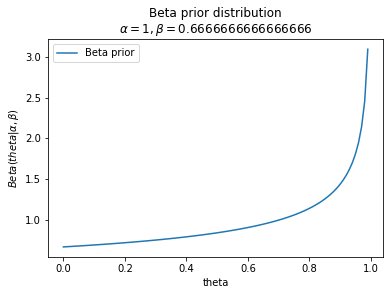

In [10]:
#Answer-3.1 plotting

from scipy.special import beta as B
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


prior_alpha = 1
prior_beta = 2/3
#Let's define theta as:
theta = np.arange(0,1,.01)

#The Beta distribution formula is:
Beta_prior = theta**(prior_alpha-1)*(1-theta)**(prior_beta-1)/B(prior_alpha, prior_beta)
#Let's plot it:
plt.plot(theta,Beta_prior, label="Beta prior")
plt.title('Beta prior distribution''\n'r'$\alpha=$' + str(prior_alpha) + r'$, \beta=$' + str(prior_beta))
plt.ylabel(r'$Beta(theta|\alpha,\beta)$')
plt.xlabel('theta')
plt.legend()
plt.show()

**ANSWER-3.2:**

2) A random sample of 1000 Californians is taken, 65% support the death peanlty. What are your posterior mean and variance ? Plot the posterior density function.

Our posterior is:

 $ p(\theta | y) = Beta(\theta|y + \alpha, n − y + \beta)$ where $n=1000$ and $y=650$. So it becomes:

 $$ p(\theta | y) = Beta(\theta|651, 350 + (2/3))$$



Prior Beta Mean =  0.6499168053244592
Prior Beta Variance =  0.00022691983192949614


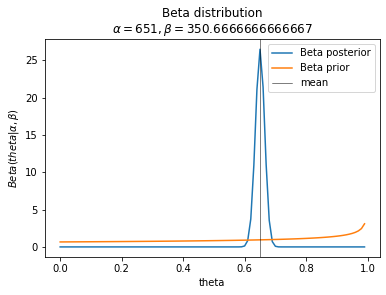

In [11]:
#The posterior mean and variance:

post_alpha = 650+ prior_alpha
post_beta = 350.+ prior_beta
post_beta_mean = post_alpha /(post_alpha + post_beta)
post_beta_variance = (post_alpha * post_beta) / ((post_alpha + post_beta)**2 * (post_alpha + post_beta + 1))
print("Prior Beta Mean = ",post_beta_mean)
print("Prior Beta Variance = ",post_beta_variance)


Beta_post = theta**(post_alpha-1)*(1-theta)**(post_beta - 1)/B(post_alpha, post_beta)

#Let's plot it:
plt.plot(theta,Beta_post,  label ="Beta posterior")
plt.plot(theta,Beta_prior, label ="Beta prior")
plt.title('Beta distribution''\n'r'$\alpha=$' + str(post_alpha) + r'$, \beta=$' + str(post_beta))
plt.ylabel(r'$Beta(theta|\alpha,\beta)$')
plt.xlabel('theta')
plt.axvline(x=post_beta_mean, linewidth=0.5, color = 'black', label="mean")
plt.legend()
plt.show()

**ANSWER-3.3:**

3) Examine the impact of the prior parameters on the posterior distribution through different statistics (i.e mean, median, 95% posterior interval).

In [12]:
n =1000
y = 650

alpha_prior = [1,10,50,100]
beta_prior = [1,10,50,100]
pairs = [[ai, bi] for ai in alpha_prior for bi in beta_prior]

results = []

for a,b in pairs:
    post_alpha = y + a -1
    post_beta = n + b - y -1
    sample_posterior = np.random.beta(post_alpha, post_beta, size=500) 
    sample_stats = np.quantile(sample_posterior, [0.05, 0.5, 0.95])
    results.append([a,b, a/(a+b), sample_stats[1], [sample_stats[0], sample_stats[2]]])

pd.DataFrame(results, columns=['alpha', 'beta', 'prior mean', 'post median','95% post CI'])

,alpha,beta,prior mean,post median,95% post CI
0,1,1,0.500000,0.648108,"[0.6254201668186204, 0.6764666043944779]"
1,1,10,0.090909,0.644635,"[0.6187740684903827, 0.6676608588998948]"
2,1,50,0.019608,0.618695,"[0.5962598065679118, 0.6461212993506268]"
3,1,100,0.009901,0.592100,"[0.5675733767459386, 0.6147360260452448]"
4,10,1,0.909091,0.653949,"[0.6318011494021741, 0.6765286963234853]"
5,10,10,0.500000,0.646836,"[0.6232227373150487, 0.6701740026286431]"
6,10,50,0.166667,0.622157,"[0.5992306079761578, 0.6452468327794314]"
7,10,100,0.090909,0.594599,"[0.5715298964455059, 0.6208690538684474]"
8,50,1,0.980392,0.665655,"[0.6401716570963475, 0.6915601856434519]"
9,50,10,0.833333,0.660772,"[0.6350121284354392, 0.6848927431429055]"


## Exercise 4

**1) Which of the expressions below correspond to the statement: *the probability of rain on Monday* ?**

- Pr(rain)
- Pr(rain|Monday)-> THIS ONE. Because we know that it is gonna be Monday, and the question asks probability of rain. (Probability of rain given Monday)
- Pr(Monday|rain) 
- Pr(rain, Monday) / Pr(Monday) -> and THIS ONE. Because Pr(rain, Monday) / Pr(Monday) = Pr(rain|Monday)


**2) Which of the following statements corresponds to the expression: *Pr(Monday|rain)* ?**

- The probability of rain on Monday. ==> P(rain|Monday) 
- The probability of rain, given that it is Monday.  ==> P(rain|Monday) 
- The probability that it is Monday, given that it is raining. ==> P(Monday|rain) (THIS ONE)
- The probability that it is Monday and it is raining.==> P(Monday, rain)


So the ANSWER is the 3rd one.

**3) Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining* ?**

- Pr(Monday|rain) YES
- Pr(rain|Monday) NO
- Pr(rain | Monday)Pr(Monday) NO
- Pr(rain | Monday)Pr(Monday)/Pr(rain) YES
- Pr(Monday|rain)Pr(rain)/Pr(Monday) NO

## Exercise 5

Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them appart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. 

**What is the probability that her next birth will also be twins ?**

In [13]:

#For the first birth, the likelihood of species A to give birth to twins is:
a_likelihood = 0.1
#For the first birth, the likelihood of species B to give birth to twins is:
b_likelihood = 0.2
likelihood = np.array([a_likelihood, b_likelihood])

#Assume species are equally likely accroding to given information in the question
prior = np.array([1, 1]) 

#Calculate the posterior and normalize it:
posterior = likelihood * prior
posterior = posterior / sum(posterior)
print(posterior)

##The probability the next birth is twins is=(The probability the panda belongs to each species) * (The likelihood each species gives birth to twins)
result = (posterior[0] * a_likelihood) + (posterior[1] * b_likelihood)
print("the probability that her next birth will also be twins is", result)

[0.33333333 0.66666667]
the probability that her next birth will also be twins is 0.16666666666666666
